In [24]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import healpy as hp
from tqdm import tqdm
sys.path.append('../')
%matplotlib inline

In [21]:
%load_ext autoreload
%autoreload 2
from dance.delens import Delens
from dance.utils import bin_cmb_spectrum
from dance.sampling import Likelihood
from dance.utils import plot_posterior

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
basedir = '/mnt/sdceph/users/alonappan/DANCE_debug'

In [17]:
d_stategy1 = Delens(basedir,2048,6,beta=0.35,lmin_ivf=2,lmax_ivf=4096,lmax_qlm=4096,verbose=0)
d_stategy2 = Delens(basedir,2048,6,beta=0.35,lmin_ivf=200,lmax_ivf=4096,lmax_qlm=4096,verbose=0)

/mnt/home/alonappan/anaconda3/cstm_pkgs/plancklens/plancklens/utils.py:124: RuntimeWarning: overflow encountered in cast
  return hashlib.sha1(np.copy(cl.astype(dtype), order='C')).hexdigest()


In [18]:
lh_stategy1_lowl = Likelihood(d_stategy1,lmax=200,debias=False)
lh_stategy1_lowl_debias = Likelihood(d_stategy1,lmax=200,debias=True)
lh_stategy2_lowl = Likelihood(d_stategy2,lmax=200,debias=False)

lh_stategy1_highl = Likelihood(d_stategy1,lmax=1000,debias=True)

In [ ]:
lensed_samp_lowl = lh_stategy1_lowl.get_lensed_samp(getdist=False)
delensed_s1_samp_lowl_biased = lh_stategy1_lowl.get_delensed_samp(getdist=False,debias=False)
delensed_s1_samp_lowl_debiased = lh_stategy1_lowl_debias.get_delensed_samp(getdist=False,debias=True)
delensed_s2_samp_lowl_unbiased = lh_stategy2_lowl.get_delensed_samp(getdist=False,debias=False)
lowl_samps = [lensed_samp_lowl,delensed_s1_samp_lowl_biased,delensed_s1_samp_lowl_debiased,delensed_s2_samp_lowl_unbiased]
lowl_labels = ['Lensed','Delensed (S1, Biased)','Delensed (S1,Debiased)', 'Delensed (S2, Unbiased)']

lensed_samp_highl = lh_stategy1_highl.get_lensed_samp(getdist=False)
delensed_s1_samp_highl_unbiased = lh_stategy1_highl.get_delensed_samp(getdist=False,debias=True)
highl_samps = [lensed_samp_highl,delensed_s1_samp_highl_unbiased]
highl_labels = ['Lensed','Delensed (S1, Debiased)']

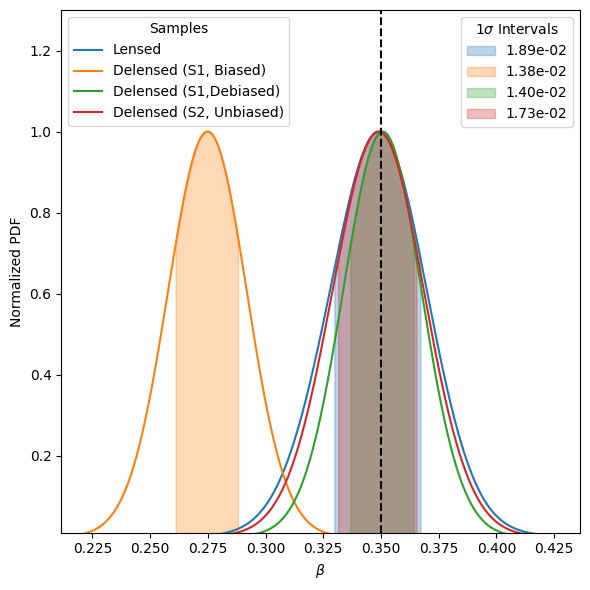

In [40]:
plot_posterior(lowl_samps,r'$\beta$',lowl_labels,truth=0.35,backend='sklearn',bandwidth=0.01,sigma_line=False,fill_alpha=0.3)

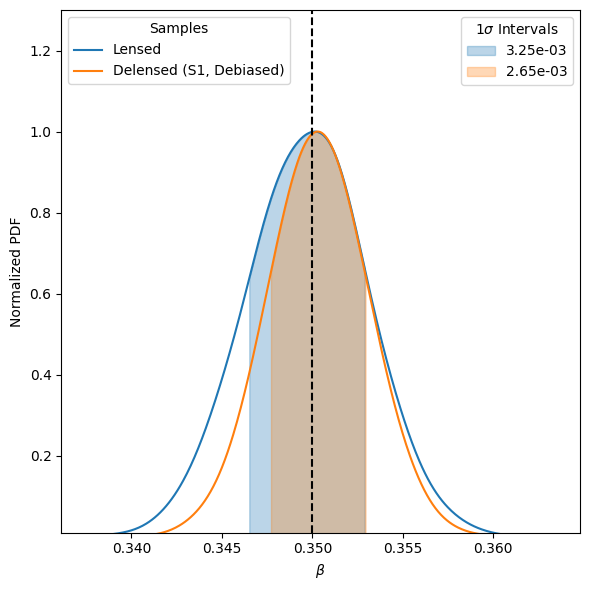

In [41]:
plot_posterior(highl_samps,r'$\beta$',highl_labels,truth=0.35,backend='sklearn',bandwidth=0.001,sigma_line=False,fill_alpha=0.3)

In [44]:
data = d_stategy1.get_data(debias=True)
data.keys()

dict_keys(['b', 'lens', 'delens', 'delens_theory', 'bias'])

In [46]:
bias = data['bias']
b = data['b']
lens_array = data['lens']
delens_theory_array = data['delens_theory']
delens_recon_biased = data['delens']

In [47]:
db = b * (b + 1) / (2 * np.pi)

In [48]:
eb_signal =d_stategy1.recon.wf.cmb.get_cb_lensed_spectra(0.35,dl=False)['eb']
l = np.arange(len(eb_signal))
dl = l * (l+1) / (2 * np.pi)

Text(0, 0.5, '$\\frac{\\ell(\\ell +1)}{2 \\pi} C_{\\ell}^{EB}$')

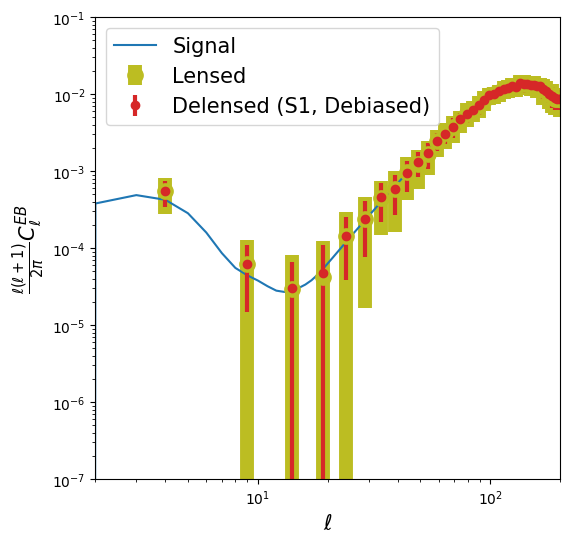

In [76]:
plt.figure(figsize=(6,6))
plt.errorbar(b,lens_array.mean(axis=0)*db,yerr=lens_array.std(axis=0)*db,fmt='o',label='Lensed',ms=11,elinewidth=10,color='C8')
plt.loglog(dl*eb_signal,label='Signal')
plt.errorbar(b,(delens_recon_biased.mean(axis=0)+bias)*db,yerr=delens_recon_biased.std(axis=0)*db,fmt='o',label='Delensed (S1, Debiased)',ms=6,elinewidth=3,color='C13')
plt.xlim(2,200)
plt.ylim(1e-7,1e-1)
plt.legend(fontsize=15)
plt.xlabel(r'$\ell$',fontsize=15)
plt.ylabel(r'$\frac{\ell(\ell +1)}{2 \pi} C_{\ell}^{EB}$',fontsize=15)